In [5]:
import pandas as pd
import geopandas as gp
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

tree_data = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da", 
                               index_col="id", engine='python')

# Introduction

This project aims to visualize the amount of trees, their quality, and what neighborhood they reside in.  I decided that if a neiborhood has more trees, the quality of that neiborhood improves.  At first, I wanted to compare the air quality of Pittsburgh to measure the best neighborhood, but unfortunately there was not a dataset fitting enough for this.  Instead, I decided to show the amount of trees and the condition of which they are in to show which neighborhood contains better air quality. 

In [ ]:
treefiltered = tree_data.filter(['neighborhood', 'condition', 'air_quality_benfits_total_dollar_value'])
treefiltered = tree_data[tree_data['common_name'] != 'Stump']

treefiltered = treefiltered[treefiltered['neighborhood'].notnull()]
treefiltered = treefiltered[treefiltered['condition'].notnull()]

# Amount of Trees

The graph below shows the amount of trees in each neighborhood, giving us a good idea of how much green space is being covered in each location.  At a glance, a majority of the neighborhoods are out of the picture because they do not contain many trees.  Only neighborhoods with a larger amount of trees are considered for this metric.

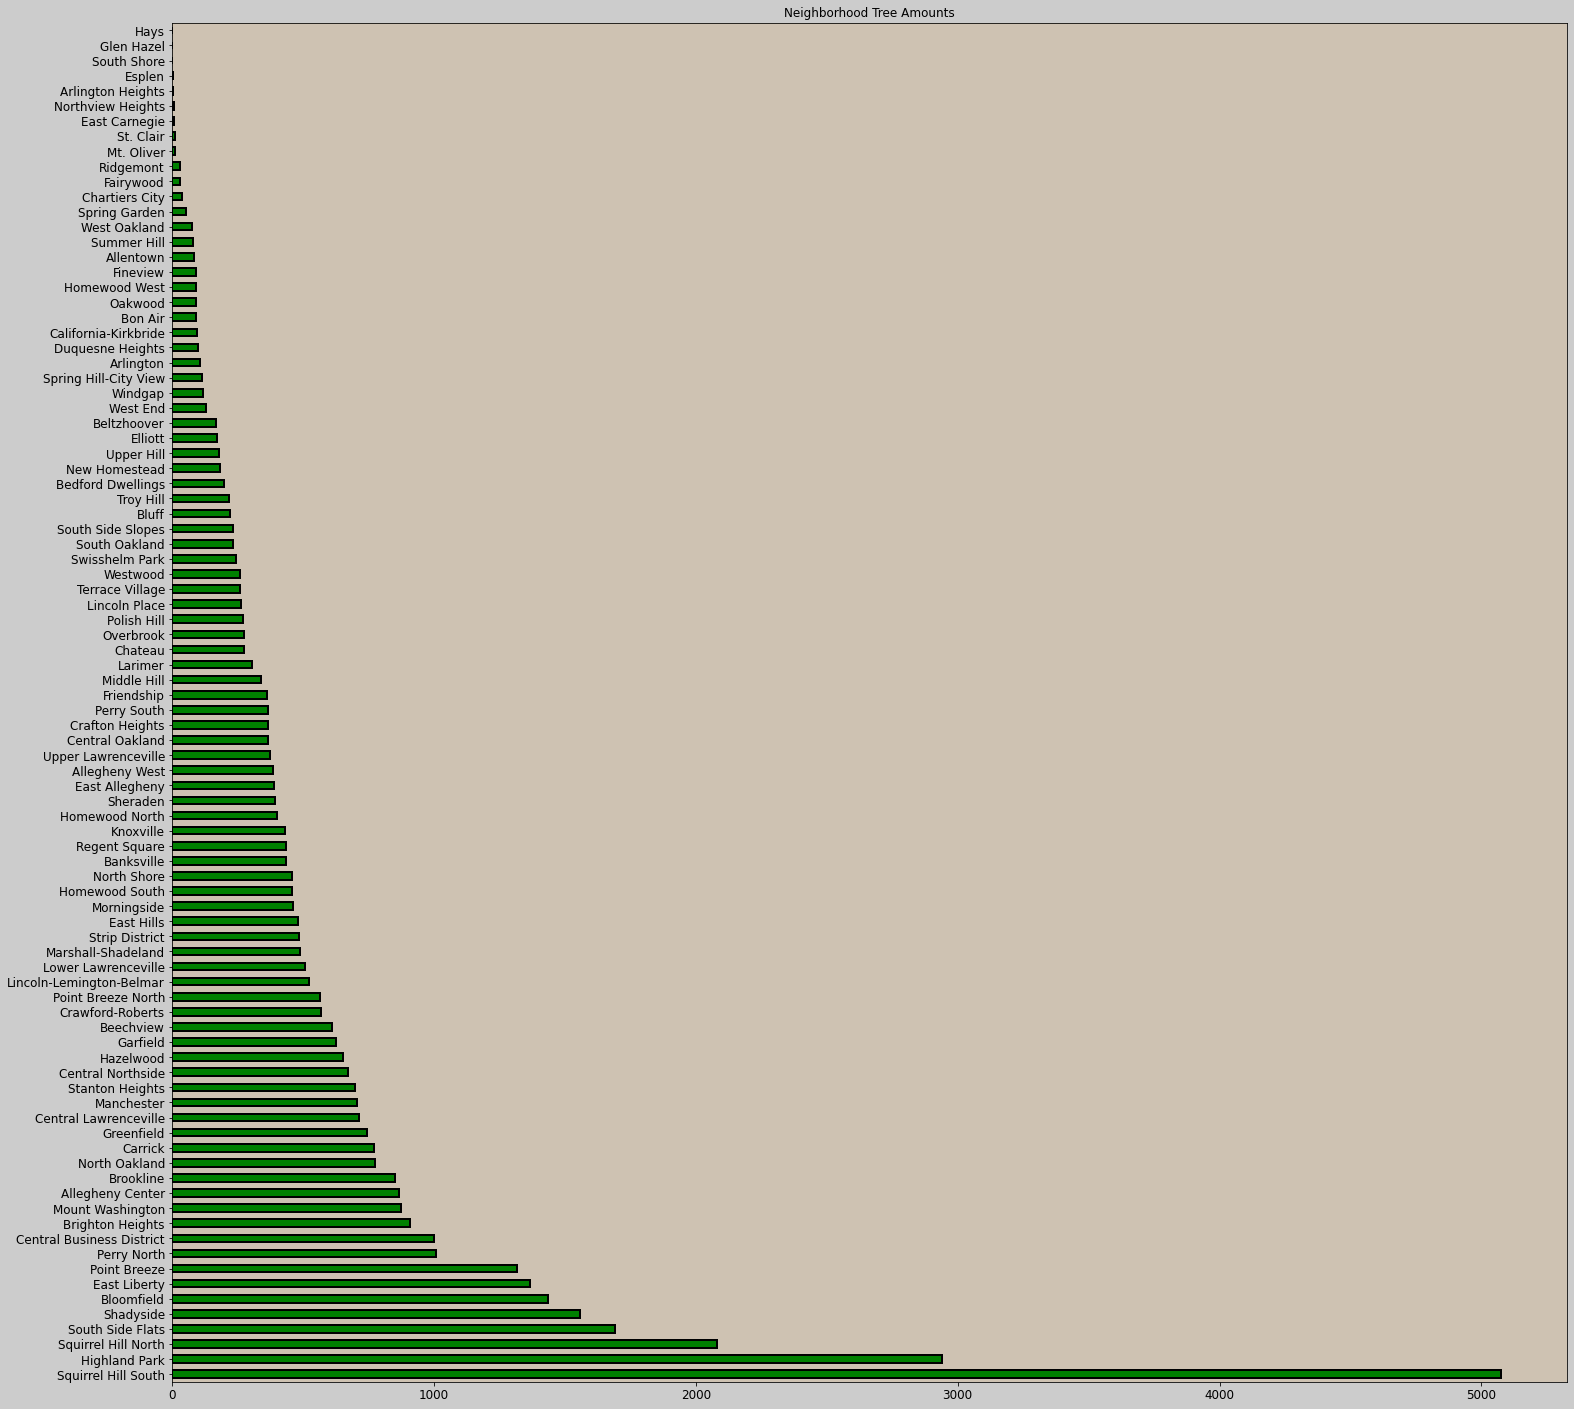

In [7]:
fig = plt.figure()
fig.patch.set_facecolor('black')
fig.patch.set_alpha(0.2)

nta = tree_data['neighborhood'].value_counts().plot(kind='barh', figsize=(25,25), title='Neighborhood Tree Amounts', fontsize=12,
                                             color='g', edgecolor='black', linewidth=2)
nta.set(facecolor = 'tan')
nta.patch.set_alpha(0.4)

In [6]:
tree_amount = tree_data['neighborhood'].value_counts().rename_axis('neighborhood').to_frame('Total_Trees')
tree_amount.head(10)

,Total_Trees
neighborhood,
Squirrel Hill South,5073
Highland Park,2941
Squirrel Hill North,2083
South Side Flats,1693
Shadyside,1558
Bloomfield,1436
East Liberty,1366
Point Breeze,1316
Perry North,1007


# Tree Quality

The graph below shows the condition of every tree in Pittsburgh, trees with a poor condition or lower do not contribute too much in terms of air quality.  In addition to this, I have removed every stump from the set because stumps do not contribute to green space, they do not offer any benefits.  Overall the condition of trees in Pittsburgh are mostly positive, about 80% of trees in Pittsbugh are in Fair or Good quality. Under 2% of trees are Dead, and about 15% are in Poor or Critical condition.  The only trees that do not contribute anything, are the ones that are dead.  It is such a small amount of tre

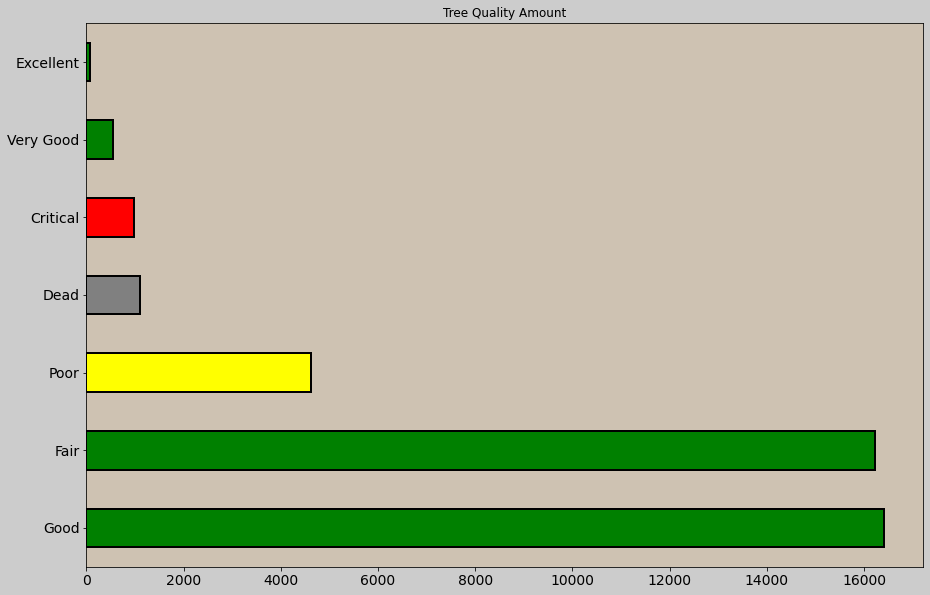

In [11]:
fig = plt.figure()
fig.patch.set_facecolor('black')
fig.patch.set_alpha(0.2)

tqa = tree_data['condition'].value_counts().plot(kind='barh', figsize=(15,10), title='Tree Quality Amount', fontsize=14, 
                                           color=['green','green','yellow','gray','red','green','green'], edgecolor='black', linewidth=2)
tqa.set(facecolor = 'tan')
tqa.patch.set_alpha(0.4)

In [17]:
tree_amount = tree_data['condition'].value_counts().rename_axis('condition').to_frame('Total_Trees')
tree_amount

,Total_Trees
condition,
Good,16404
Fair,16233
Poor,4615
Dead,1100
Critical,988
Very Good,554
Excellent,79


# Conclusion 

Based on the data I was able to view, I came to the conclusion that Squirrel Hill South is the best neighborhood in Pittsburgh.  The amount of trees in that neighboorhood was greater than every other one by a sizeable amount, it almost doubled the amount of trees in Highland Park.  The amount of trees pretty much sealed the deal for my metric, because having a larger amount of trees contributes more to air quality.  In addition to the air quality, each tree contributes to the green space of each neighborhood.  Even if the dead, poor, and critical condition trees were to be removed from the data, Squirrel Hill South would still be on top.  Therefore, Squirrel Hill South contributes the most to our metric, making it the best neighborhood in terms of green space.